<a href="https://colab.research.google.com/github/maron2ee/Machine-Learning/blob/main/ml02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST (Modified National Institute of Science and Technology) 데이터 셋

* 손글씨 숫자 (0, 1, 2, ... , 9) 데이터
* 분류 알고리즘을 테스트할 때 가장 많이 사용하는 데이터 셋

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# scikit-learn 패키지에서 예제로 제공하는 MNIST 데이터 셋을 다운로드
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')      # 784 : 이미지의 크기와 관련 28*28=784 픽셀 (features)

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [ ]:
mnist['DESCR']     # mnist 데이터 셋에 대한 설명

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [ ]:
print(mnist['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [ ]:
X, y = mnist['data'], mnist['target']
# X : 손글씨 이미지 데이터
# y : 손글씨 이미지 레이블(정답)

In [ ]:
X.shape, y.shape     
#> X : 2-d array, y : 1-d array

((70000, 784), (70000,))

In [ ]:
X[0]     # X 의 첫번째 row 의 모든 컬럼(특성) 데이터 : 0 ~ 255

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [ ]:
y[0]     #> 문자열(str) 타입

'5'

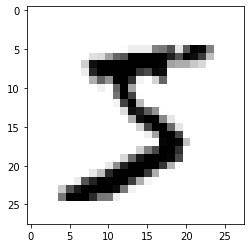

In [ ]:
img = X[0].reshape((28, 28))
plt.imshow(img, cmap=plt.cm.binary)
plt.show()

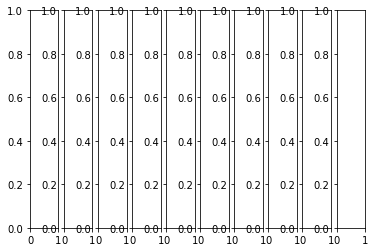

In [ ]:
# 데이터 셋 X의 첫 10개 이미지 출력
fig, ax = plt.subplots(nrows=1, ncols=10)

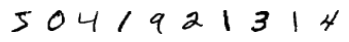

In [ ]:
# 데이터 셋 X의 첫 10개 이미지 출력
fig, ax = plt.subplots(nrows=1, ncols=10)
for i in range(10):
  img = X[i].reshape((28, 28))     # 784 -> 28 * 28 변환
  ax[i].imshow(img, cmap=plt.cm.binary)     # i번째 subplot에 이미지를 그림
  ax[i].axis('off')     # 좌표축 (레이블)을 제거

plt.show()

In [ ]:
# 레이블(타겟) y의 첫 10개 값을 출력
y[:10]

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4'], dtype=object)

In [ ]:
# 레이블(타겟) y는 문자열 타입 -> 숫자로 변환 
y = y.astype(np.int16)     # 16bit(=2byte) 정수
y[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=int16)

In [ ]:
# train / test 셋 분리
n = 60_000     # 훈련 셋의 데이터 개수
X_train, y_train = X[:n], y[:n]     # 0 <= i < 60_000
X_test, y_test = X[n:], y[n:]     # 60_000 <= i < 70_000
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

# 2진 분류기 (Binary Classifier)

 * 양성 / 음성
 * 스팸 / 스팸 X

In [ ]:
# 5와 5가 아닌 숫자를 분류하는 문제
y_train_5 = (y_train == 5)     # 5는 True, 다른 숫자는 False
y_test_5 = (y_test ==5)     

In [ ]:
y_train_5[:10]

array([ True, False, False, False, False, False, False, False, False,
       False])

In [ ]:
# 분류 알고리즘 선택
from sklearn.linear_model import SGDClassifier

In [ ]:
# 머신러닝 모델 객체 생성
sgd_clf = SGDClassifier(random_state=1)

In [ ]:
# 모델 훈련
sgd_clf.fit(X=X_train, y=y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=1, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# 훈련된 모델이 훈련셋을 어떻게 예측하는지
y_train_5_pred = sgd_clf.predict(X=X_train)
y_train_5_pred[:10]

array([ True, False, False, False, False, False, False, False, False,
       False])

In [ ]:
# 적확도 (accuracy) : 실제값과 예측값이 얼마나 같은지
np.mean(y_train_5 == y_train_5_pred)

0.9685333333333334

# 분류(classification)의 평가 지표(metrics)


In [ ]:
# 오차 행렬, 혼동 행렬(confusion matrix)
from sklearn.metrics import confusion_matrix

In [ ]:
conf_mat = confusion_matrix(y_true=y_train_5,           # 실제 값(레이블) 
                            y_pred=y_train_5_pred)      # 예측 값
conf_mat

array([[53381,  1198],
       [  690,  4731]])

문제에 따라서 비율 중요성이 달라짐
* TN (True Negative, 진음성) : 실제 음성을 음성으로 예측
* **FP (False Positive, 가양성)** : 실제 음성을 양성으로 잘못 예측
    _스팸 메일 구분
* **FN (False Negative, 가음성)** : 실제 양성을 음성으로 잘못 예측
    _코로나 진단키트
* TP (True Positive, 진양성) : 실제 양성을 양성으로 예측

In [ ]:
tn, fp = conf_mat[0,0], conf_mat[0,1]
fn, tp = conf_mat[1,0], conf_mat[1,1]

In [ ]:
# 정확도 (accuracy) : 전체 샘플들을 정확히 분류한 비율
accuracy = (tn + tp) / (tn + fp + fn + tp)
accuracy

0.9685333333333334

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_true=y_train_5, y_pred=y_train_5_pred)
acc

0.9685333333333334

In [ ]:
# 정밀도 (precision) : 양성(positive) 예측들 중에서 정답의 비율
precision = tp / (fp + tp)
precision

0.7979423174228369

In [ ]:
from sklearn.metrics import precision_score

precision = precision_score(y_true = y_train_5, y_pred = y_train_5_pred)
precision

0.7979423174228369

In [ ]:
# 재현율 (recall), 민감도 (sensitivity), TPR (True Positive Rate, 진양성 비율)
# 실제 양성 샘플들 중에서 정답의 비율

recall = tp / (fn + tp)
recall

0.8727172108467073

In [ ]:
from sklearn.metrics import recall_score

recall = recall_score(y_true = y_train_5, y_pred = y_train_5_pred)
recall

0.8727172108467073

In [ ]:
# F1 score : 정밀도와 재현율의 조화 평균
f1 = 2 / (1/precision + 1/recall)
f1

0.8336563876651982

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_true = y_train_5, y_pred = y_train_5_pred)
f1

0.8336563876651982

# 정밀도 - 재현율 트레이드오프 (precision/recall trade-off)
* 일반적으로 정밀도 좋아지면, 재현율은 나빠짐

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
predictions = cross_val_predict(estimator=SGDClassifier(random_state=1),     # 머신러닝 모델
                               X=X_train,     # 훈련 셋
                               y=y_train_5,     # 훈련 레이블 (타겟)
                               cv=3,     # 교차 검증 횟수 (fold)
                               method='predict')     # 예측값 리턴

predictions

array([ True, False, False, ...,  True, False, False])

In [ ]:
pred_scores = cross_val_predict(estimator = SGDClassifier(random_state=1),
                                X=X_train,
                                y=y_train_5,
                                cv=3,
                                method='decision_function')

pred_scores

array([  8536.87948485,  -9930.42427547, -34430.63925683, ...,
         6041.93526298,  -4785.17366605,  -8938.21271251])

In [ ]:
# 정밀도 / 재현율 곡선
from sklearn.metrics import precision_recall_curve     # threshold : 임계값

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_true=y_train_5,
                                                         probas_pred=pred_scores)

len(precisions), len(recalls), len(thresholds)     # thresholds 갯수가 precisions, recalls 갯수 보다 항상 1 작음 (숫자 3개, 간격 2개)

(59586, 59586, 59585)

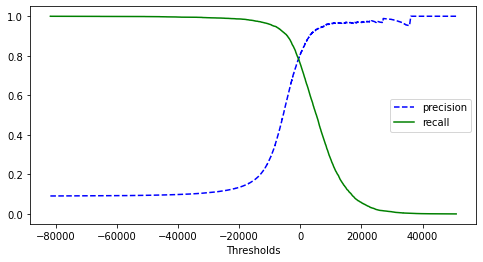

In [ ]:
# precision / recall vs. threshold 그래프
# threshold 의 값에 따른 정밀도와 재현율의 변화
plt.figure(figsize=(8,4))
plt.plot(thresholds, precisions[:-1], 'b--', label='precision')     # thresholds 값과 맞추기 위해 precisions 마지막 하나 빼기
# 'b--' : color = blue, linestyle = dashed (--)
plt.plot(thresholds, recalls[:-1], 'g-', label='recall')
# 'g-' : color = green, linestyle = solid (-)

plt.legend()     # 범례 추가
plt.xlabel('Thresholds')
plt.show()

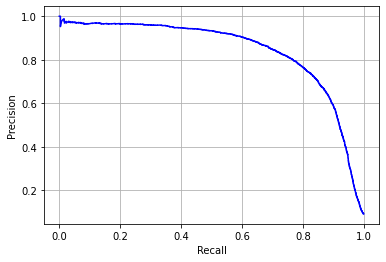

In [ ]:
# Recall vs. Precision curve      
# 두개가 동시에 좋아질 수 는 없지만 (0.0 ~ 0.7 정도는 둘 다 보완)

plt.plot(recalls, precisions, 'b-')

plt.grid(True)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# ROC (Receiver Operating CHaracteristic) Curve

* FPR (False Positive Rative, 가양성 비율)에 대한 TPR (True Positive Rate, 진양성 비율) 곡선
* TPR (True Positive Rate) = Recall = TP / (FN + TP) : 실제 양성 샘플들 중에서 양성 예측
* TNR (True Negative Rate) = TN / (TN + FP) : 실제 음성 샘플들 중에서 음성 예측(정답)의 비율
* FPR (False Positive Rate) = 1 - TNR : 실제 음성 샘플들 중에서 양성 예측(오답)의 비율

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr, tpr, thresholds = roc_curve(y_true=y_train_5, 
                                 y_score=pred_scores)

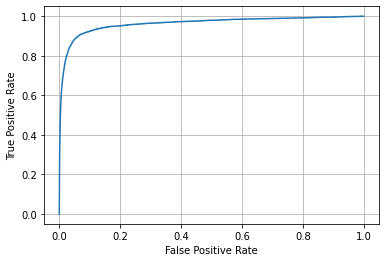

In [ ]:
plt.plot(fpr, tpr)     # 왼쪽 상단의 꼭지점이 1.0 에 가까울수록 (곡선 아래쪽 면적이 넓을수록) 좋은 그래프

plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
# AUC (Area Under the Curve) : ROC 곡선 아래 넓이 (면적)
# AUC 가 1에 가까울 수록 좋은 모델

from sklearn.metrics import roc_auc_score

roc_auc_score(y_true=y_train_5, y_score=pred_scores)

0.962647024223004

* PR 곡선 : 양성 클래스가 드물거나 가음성(FN) 보다 가양성(FP)가 중요할 때, 보통 사용 // 
양성 샘플의 수가 음성 샘플의 수보다 작을 때
* ROC 곡선 : 그렇지 않은 경우에는 일반적으로 roc를 사용

In [ ]:
# SGC 분류기와 랜덤 포레스트 분류기와 비교
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest_clf = RandomForestClassifier(random_state=1)

In [ ]:
forest_pred_scores = cross_val_predict(estimator=forest_clf,
                                       X=X_train,
                                       y=y_train_5,
                                       cv=3,
                                       method='predict_proba')

In [ ]:
forest_pred_scores     # 왼 : 5가 아닐 확률, 오 : 5가 맞을 확률 // 2-d array 
# 60,000개 훈련 셋의 [prob(negative), prob(positive)]

array([[0.07, 0.93],
       [0.98, 0.02],
       [0.96, 0.04],
       ...,
       [0.  , 1.  ],
       [0.92, 0.08],
       [0.94, 0.06]])

In [ ]:
forest_pred_scores.shape

(60000, 2)

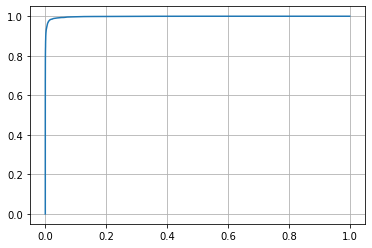

In [ ]:
# Random Forest 의 ROC 곡선
forest_fpr, forest_tpr, _ = roc_curve(y_true=y_train_5,     # 값 안 넣어줄꺼면, _ 입력
                                      y_score=forest_pred_scores[:, 1])     # row는 다 선택하고 column은 1번만 - 5가 될 확률

plt.plot(forest_fpr, forest_tpr)
plt.grid()
plt.show()

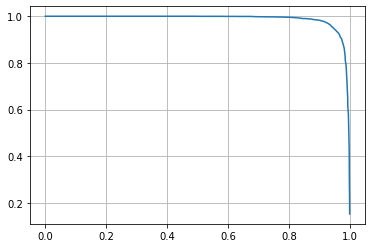

In [ ]:
# Random Forest 의 PR 곡선
# 우상단으로 올라갈 수록 (아래 면적 1에 가까울 수록) 좋은 성능을 낼것이라 예측할 수
forest_prec, forest_rec, _ = precision_recall_curve(y_true=y_train_5,
                                                    probas_pred=forest_pred_scores[:, 1])

plt.plot(forest_rec, forest_prec)
plt.grid()
plt.show()

# Multiclass Classification (다중 클래스 분류)

In [ ]:
sgd_clif = SGDClassifier(random_state=1)     # 모델 생성
sgd_clf.fit(X=X_train, y=y_train)     # 모델 학습
y_pred = sgd_clf.predict(X=X_train)
y_pred

array([3, 0, 4, ..., 5, 6, 8], dtype=int16)

In [ ]:
# confidence score : 샘플이 클래스에 속할 수 있는 점수
conf_scores = sgd_clf.decision_function(X=X_train)
conf_scores 

array([[-24670.54831945, -24956.18602024,  -8946.54366192, ...,
        -21540.55134475, -12611.04215094,  -8413.53889667],
       [ 35115.54260117, -29238.15978494, -10522.21560933, ...,
        -20088.61022822,  -8671.69431041,  -8280.94497265],
       [-44963.27137232, -19436.94360558,  -4521.12867711, ...,
         -8694.04566573, -11086.08921073,  -9950.6497012 ],
       ...,
       [-27527.03192197,  -8896.09595732, -13969.34592318, ...,
        -28910.63557095,  -4096.07930681, -14406.76402143],
       [-24472.13816489, -15909.53454174,  -7950.52483362, ...,
        -20823.11099216, -14185.0520895 , -11458.78080004],
       [ -7079.58427496, -27307.02283194, -11328.34979779, ...,
        -18458.33310161,   2158.50975994,   -216.52178007]])

In [ ]:
conf_scores.shape    # column 10 개 = 0 ~ 9

(60000, 10)

In [ ]:
# 0번 샘플의 점수
conf_scores[0]

array([-24670.54831945, -24956.18602024,  -8946.54366192,    891.72458906,
       -22089.09807895,    767.86799436, -24257.4166882 , -21540.55134475,
       -12611.04215094,  -8413.53889667])

In [ ]:
# 배열(array)에서 최대값의 인덱스를 리턴
np.argmax(conf_scores[0])     

3

In [ ]:
# 정확도 (accuracy) - 2진분류에 비해 성능 떨어짐
accuracy_score(y_true=y_train, y_pred=y_pred)

0.8826833333333334

In [ ]:
# confusion matrix  - 대각선 값 : 맞은 갯수, 나머지 값 : 틀린 갯수
# 왼 행 : 실제 0, 1, 2, 3, ... , 9 
# 오 열 : 예측 0, 1, 2, 3, ... , 9
conf_mat = confusion_matrix(y_train, y_pred)
conf_mat

array([[5736,    1,   48,    8,   22,   15,   50,    4,   14,   25],
       [   2, 6590,   51,    9,   17,    8,   27,    3,   22,   13],
       [  28,   36, 5531,   48,   90,   17,   91,   19,   64,   34],
       [  67,   36,  365, 5048,   58,  290,   46,   22,   58,  141],
       [   1,   28,   28,    1, 5649,    5,   43,    4,    6,   77],
       [ 101,   20,   97,  168,  266, 4367,  141,   25,   82,  154],
       [  41,    3,   51,    1,   51,   42, 5711,    0,   12,    6],
       [  16,   34,  107,   78,  160,    9,    7, 5525,    9,  320],
       [  53,  155,  423,  125,  322,  212,   82,   16, 3999,  464],
       [  18,   36,   20,   94,  796,   20,    3,  151,    6, 4805]])

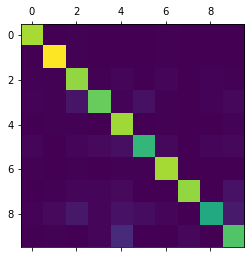

In [ ]:
plt.matshow(conf_mat)
plt.show()

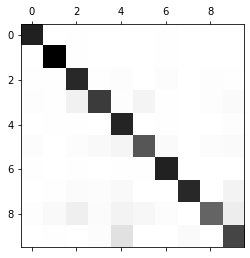

In [ ]:
plt.matshow(conf_mat, cmap=plt.cm.binary)    # 숫자 (정답 갯수) 크면 클수록 검정색
plt.show()
# 대각선 : 정답을 맞춘 부분
# 대각선 이외의 영역에서 색이 진한 부분 : 오답이 많은 부분